<a href="https://colab.research.google.com/github/hhobot/Laba4_analit/blob/main/%D0%9B%D0%B0%D0%B1%D0%B04_%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

In [ ]:
df.shape

(891, 12)

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
 #уберем все неизвестные значения 'Sex', 'Age', 'Pclass'
 df = df.dropna(subset=['Sex', 'Age', 'Pclass'])

In [ ]:
df.query('Survived == 1').shape[0]

290

In [ ]:
df.query('Survived == 1').shape[0] * 100 / df.shape[0]

40.61624649859944

In [ ]:
df.query('Survived == 1').groupby('Sex', as_index=False).agg({'Survived':'count'})

,Sex,Survived
0,female,197
1,male,93


In [ ]:
df.query('Survived == 1').groupby('Pclass', as_index=False).agg({'Survived':'count'})

,Pclass,Survived
0,1,122
1,2,83
2,3,85


In [ ]:
df_kids = df.query('Age <= 16 and Survived == 1').groupby('Age', as_index=False).agg({'Survived':'count'})
df_kids['count'] = df.query('Age <= 16').groupby('Age', as_index=False).agg({'Age':'count'})
df_kids

,Age,Survived,count
0,0.42,1,1
1,0.67,1,1
2,0.75,2,2
3,0.83,2,2
4,0.92,1,1
5,1.00,5,7
6,2.00,3,10
7,3.00,5,6
8,4.00,7,10
9,5.00,4,4


In [ ]:
df_kids.query('Survived > count')

,Age,Survived,count
16,13.0,2,1
17,14.0,3,2
19,16.0,6,1


In [ ]:
df.Age = pd.cut(df.Age, 10)

In [ ]:
df_survived = df.query('Survived == 1').groupby(['Age', 'Pclass', 'Sex']).agg({'Survived':'count'})

In [ ]:
df_survived['Survived'].sum()
# значения в начале работы совпадает с нынешним, значит мы не потеряли данные 

290

In [ ]:
df_survived['name'] = range(df_survived.shape[0])
df_sur = pd.DataFrame(columns={'Survived'}, index=range(df_survived.shape[0]))
list_sur= []
[list_sur.append(df_survived['Survived'][i]) for i in range(df_survived.shape[0])]
df_sur['Survived'] = list_sur
df_sur

,Survived
0,0
1,2
2,8
3,9
4,11
5,6
6,5
7,1
8,2
9,0


[Text(0, 0.5, 'Survived'),
 Text(0.5, 0, 'conditional index of all survivors'),
 Text(0.5, 1.0, 'conditional indicator of all surviving profitability')]

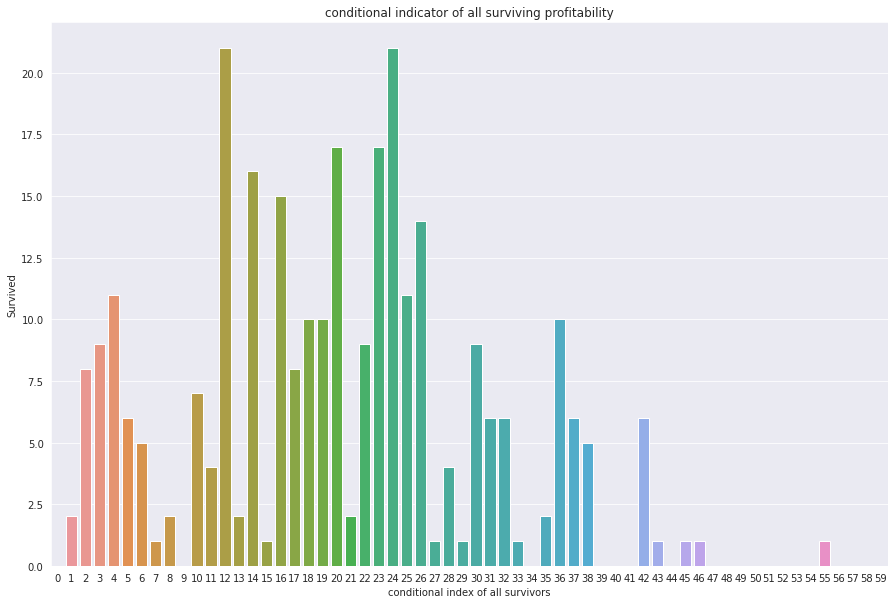

In [ ]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(y='Survived', x = df_sur.index , data=df_sur )
ax.set(ylabel="Survived",
       xlabel="conditional index of all survivors",
       title="conditional indicator of all surviving profitability")

In [ ]:
df_survived

Survived  name
Age              Pclass Sex                   
(0.34, 8.378]    1      female         0     0
                        male           2     1
                 2      female         8     2
                        male           9     3
                 3      female        11     4
                        male           6     5
(8.378, 16.336]  1      female         5     6
                        male           1     7
                 2      female         2     8
                        male           0     9
                 3      female         7    10
                        male           4    11
(16.336, 24.294] 1      female        21    12
                        male           2    13
                 2      female        16    14
                        male           1    15
                 3      female        15    16
                        male           8    17
(24.294, 32.252] 1      female        10    18
                        male          10    19
                 2      female        17    20
                        male           2    21
                 3      female         9    22
                        male          17    23
(32.252, 40.21]  1      female        21    24
                        male          11    25
                 2      female        14    26
                        male           1    27
                 3      female         4    28
                        male           1    29
(40.21, 48.168]  1      female         9    30
                        male           6    31
                 2      female         6    32
                        male           1    33
                 3      female         0    34
                        male           2    35
(48.168, 56.126] 1      female        10    36
                        male           6    37
                 2      female         5    38
                        male           0    39
                 3      female         0    40
                        male           0    41
(56.126, 64.084] 1      female         6    42
                        male           1    43
                 2      female         0    44
                        male           1    45
                 3      female         1    46
                        male           0    47
(64.084, 72.042] 1      female         0    48
                        male           0    49
                 2      female         0    50
                        male           0    51
                 3      female         0    52
                        male           0    53
(72.042, 80.0]   1      female         0    54
                        male           1    55
                 2      female         0    56
                        male           0    57
                 3      female         0    58
                        male           0    59